In [1]:
import  numpy as np
import os
import csv

def get_pars(par_file):
    indexes = np.genfromtxt("/home/maria/Documents/projects/Stripe82/golden_sample_for_edition.txt")
    L0_list = []
    z0_list = []
    h_list = []
    
 
    #-------------1d-decomposition--------------
    if par_file == "config.imfit":
        for i in indexes:
            i = int(i)

            os.chdir(f"/home/maria/Documents/projects/Stripe82/decomposer_/imfit_run_{i}")
            with open(par_file) as f:
                pars = f.readlines()
            pars_splited = []

            if (len(pars)) == 8:
                for line in pars:
                    line = line.split()
                    pars_splited.append(line)
                L0_list.append(float(pars_splited[4][1]))
                h_list.append(float(pars_splited[5][1]))
                z0_list.append(float(pars_splited[7][1]))

            if (len(pars)) == 16:
                for line in pars:
                    line = line.split()
                    pars_splited.append(line)
                L0_list.append(float(pars_splited[12][1]))
                h_list.append(float(pars_splited[13][1]))
                z0_list.append(float(pars_splited[15][1]))

            

    #-------------2d-decomposition--------------
    if par_file == "bestfit_parameters_imfit.dat":
        for i in indexes:
            i = int(i)

            os.chdir(f"/home/maria/Documents/projects/Stripe82/decomposer_/imfit_run_{i}")
            with open(par_file) as f:
                pars = f.readlines()
            pars_splited = []
            disk_parameters = []
            if (len(pars)) == 29:
                for line in pars:
                    line = line.split()
                    pars_splited.append(line)
                L0_list.append(float(pars_splited[25][1]))
                h_list.append(float(pars_splited[26][1]))
                z0_list.append(float(pars_splited[28][1]))

            if (len(pars)) == 20:
                for line in pars:
                    line = line.split()
                    pars_splited.append(line)
                L0_list.append(float(pars_splited[16][1]))
                h_list.append(float(pars_splited[17][1]))
                z0_list.append(float(pars_splited[19][1]))
                
    #-----------SDSS-and-some-calulated-parameters-----------      

    ModelMag_g = []
    ModelMag_r = []
    z_spec = []
    K_correction = []
    scale_kpc_arcsec = []
    lum_distance = []
    abs_mag_sdss = []
    extinction = []

    
    with open('/home/maria/Documents/projects/Stripe82/sdss_pars.csv', "r", newline="") as f:
        reader = csv.reader(f, delimiter=' ')
        for row in reader:
            K_correction.append(float(row[9])) 
            ModelMag_g.append(float(row[6]))
            ModelMag_r.append(float(row[7])) 
            z_spec.append(float(row[3]))
            extinction.append(float(row[5]))
            scale_kpc_arcsec.append(float(row[10])) 
            lum_distance.append(float(row[11]))
            abs_mag_sdss.append(float(row[8]))


    return(L0_list, h_list, z0_list, ModelMag_g, ModelMag_r, z_spec, K_correction, scale_kpc_arcsec, lum_distance, abs_mag_sdss, extinction)

In [2]:

#----------get-model-magnutides----------
indexes = np.genfromtxt("/home/maria/Documents/projects/Stripe82/golden_sample_for_edition.txt")
mag_1d = []
mag_2d = []

for i in indexes:
    i = int(i)
    os.chdir(f"/home/maria/Documents/projects/Stripe82/decomposer_/imfit_run_{i}")
    with open("mag1d.txt") as f:
        mags = f.readlines()
    mags_splited_1d = []
    for line in mags:
        line = line.split()
        mags_splited_1d.append(line)

    with open("mag2d.txt") as f:
        mags = f.readlines()
    mags_splited_2d = []
    for line in mags:
        line = line.split()
        mags_splited_2d.append(line)

    if (len(mags_splited_1d)) == 8:  
        mag_1d.append(float(mags_splited_1d[7][2]))
        mag_2d.append(float(mags_splited_2d[7][2]))
    else:
        mag_1d.append(float(mags_splited_1d[8][2]))
        mag_2d.append(float(mags_splited_2d[8][2]))


In [3]:
par_file_1d = "config.imfit"
par_file_2d = "bestfit_parameters_imfit.dat"
#--------parameters_1d_decomp--------
L_0, h_r, z_0, ModelMag_g, ModelMag_r, z_spec, K_correction, scale_kpc_arcsec, lum_distance, abs_mag_sdss, extinction =  get_pars(par_file_1d)
h_z = np.zeros(len(z_0))


for i in range(len(z_0)):
    h_z[i] = z_0[i]/2
    
image_scale = 0.396
for i in range (len(z_0)):
    z_0[i] = z_0[i]*image_scale
    h_z[i] = h_z[i]*image_scale
    h_r[i] = h_r[i]*image_scale
    
# print(">>>>>>> L0", L_0 )
# print(">>>>>>> h", h_r )
# print(">>>>>>> z0", z_0 )
#--------parameters_2d_decomp---------  
L_0_2d, h_r_2d, z_0_2d, ModelMag_g, ModelMag_r, z_spec, K_correction, scale_kpc_arcsec, lum_distance, abs_mag_sdss, extinction = get_pars(par_file_2d)
h_z_2d =  np.zeros(len(z_0_2d))

for i  in range(len(z_0_2d)):
    h_z_2d[i] = z_0_2d[i]/2
    
image_scale = 0.396
for i in range (len(z_0_2d)):
    z_0_2d[i] = z_0_2d[i]*image_scale
    h_z_2d[i] = h_z_2d[i]*image_scale
    h_r_2d[i] = h_r_2d[i]*image_scale

#print(">>>>>>> ", lum_distance)
# print(">>>>>>> h_2d", h_r_2d )
# print(">>>>>>> z0_2d", z_0_2d )
    
initial_params = np.genfromtxt("/home/maria/Documents/projects/Stripe82/super_final_sample1.txt")
sma, smb = initial_params[:,3], initial_params[:,4]

for i in range(len(mag_1d)):
    print("%.3f " % (h_r_2d[i]))



5.719 
5.040 
5.648 
4.321 
7.329 
4.523 
3.992 
3.650 
3.651 
4.001 
4.435 
3.947 
8.729 
5.304 
3.169 
5.780 
2.503 
4.464 
3.087 
5.384 
2.999 
4.741 
3.660 
5.839 
4.086 
5.172 
4.396 
9.776 
3.844 
3.643 
6.925 
6.295 
11.934 
6.355 
5.567 
8.467 
8.876 
4.098 
5.721 
3.677 
2.670 
2.202 
3.421 
3.134 
3.755 
1.907 
4.705 
3.540 
6.266 
2.366 
4.739 


In [4]:
from scipy.stats import sem
#-------convert-h-and-z0-from-arcsec-to-kpc-------

h_1d_kpc = np.zeros(len(h_r))
z_0_1d_kpc = np.zeros(len(z_0))
h_z_1d_kpc = np.zeros(len(h_z))

h_2d_kpc = np.zeros(len(h_r_2d))
z_0_2d_kpc = np.zeros(len(z_0_2d))
h_z_2d_kpc = np.zeros(len(h_z_2d))
for i in range(len(h_r)):
    h_1d_kpc[i] = scale_kpc_arcsec[i]*h_r[i]
    z_0_1d_kpc[i] = scale_kpc_arcsec[i]*z_0[i]
    h_z_1d_kpc[i] = scale_kpc_arcsec[i]*h_z[i]
    
    h_2d_kpc[i] = scale_kpc_arcsec[i]*h_r_2d[i]
    z_0_2d_kpc[i] = scale_kpc_arcsec[i]*z_0_2d[i]
    h_z_2d_kpc[i] = scale_kpc_arcsec[i]*h_z_2d[i]

# for i in range(len(h_2d_kpc)):
#     print(i, h_2d_kpc[i])
#     print(z_0_2d_kpc[i])



0.06384445901960785
0.00410376694377782


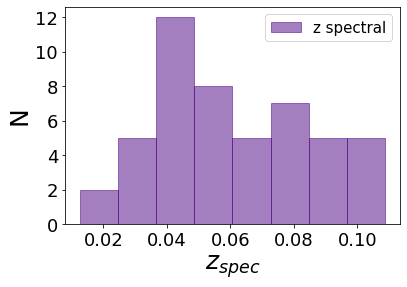

In [10]:
#---------redshift-distribution----------
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
from matplotlib.ticker import MaxNLocator
from scipy.stats import sem
plt.rcParams['text.usetex'] = False
    
fig, ax = plt.subplots()
kwargs = dict(alpha=0.5, bins=8)

n, bins, patches = ax.hist(z_spec[2:], **kwargs, color='indigo',edgecolor='indigo', label = 'z spectral')
ax.legend(loc='upper right')
ax.set_xlabel('$z_{spec}$', size = 25)
ax.set_ylabel('N', size = 25)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.xticks(size = 18)
plt.yticks(size = 18)
plt.legend(loc=0, prop={'size': 15})
plt.show


print(np.mean(z_spec))
print(sem(z_spec))


5.407576023338822
0.32649132530519054
-----
0.649112975784706
0.04174595225042994


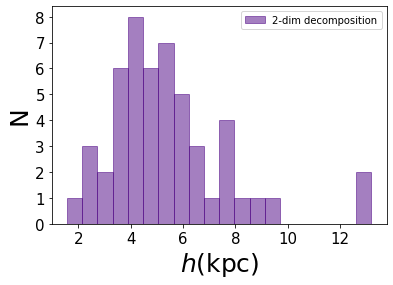

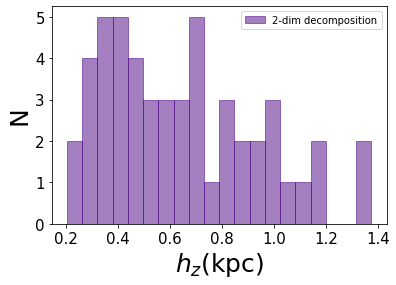

In [38]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
from matplotlib.ticker import MaxNLocator
from scipy.stats import sem
plt.rcParams['text.usetex'] = False
    
fig, ax = plt.subplots()
kwargs = dict(alpha=0.5, bins=20)


n, bins, patches = ax.hist(h_2d_kpc, **kwargs, color='indigo',edgecolor='indigo', label = "2-dim decomposition")
#n, bins, patches = ax.hist(h_r_2d, bins = 8, alpha = 0.5, color='chocolate',edgecolor='chocolate', label = "2-dim decomposition")
ax.legend(loc='upper right')
ax.set_xlabel('$h$(kpc)', size = 25)
ax.set_ylabel('N', size = 25)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show

fig, ax = plt.subplots()
kwargs = dict(alpha=0.5, bins=20)

n, bins, patches = ax.hist(h_z_2d_kpc, **kwargs, color='indigo',edgecolor='indigo', label = "2-dim decomposition")
#n, bins, patches = ax.hist(z_0_2d, bins = 6, alpha = 0.5, color='chocolate',edgecolor='chocolate', label = "2-dim decomposition")
ax.legend(loc='upper right')
ax.set_xlabel('$h_z$(kpc)', size = 25)
ax.set_ylabel('N', size = 25)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show




print(np.mean(h_2d_kpc))
print(sem(h_2d_kpc))
print("-----")

print(np.mean(h_z_2d_kpc))
print(sem(h_z_2d_kpc))

Estimated coefficients:
b_0 = 0.1301673638161615            
b_1 = 0.09792977405155472
(0.6084397576111772, 3.5208719409174107e-06)


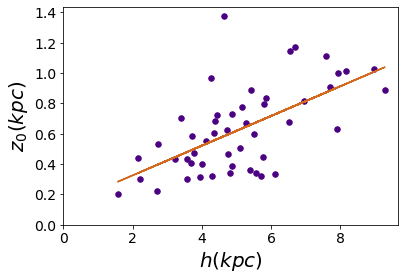

In [10]:
# plt.rcParams['text.usetex'] = False
# plt.scatter(h_r_2d,z_0_2d,color="indigo")
# plt.xlabel("h_r", size = 25)
# plt.ylabel("z_0", size = 25)

# linear_model=np.polyfit(h_1d_kpc,h_z_1d_kpc,1)
# linear_model_fn=np.poly1d(linear_model)
# x_s=np.arange(0,15)
# plt.xticks(size = 15)
# plt.yticks(size = 15)
# plt.plot(x_s,linear_model_fn(x_s),color="orange")
# print(linear_model)

# plt.show()
# print(np.mean(np.divide(h_r_2d, z_0_2d)))
# print(sem(np.divide(h_r_2d, z_0_2d)))

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
  
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
  
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
  
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
  
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
  
    return (b_0, b_1)
  
def plot_regression_line(x, y, b, xlabel, ylabel, invert_xaxis, invert_yaxis):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "indigo",
               marker = "o", s = 30)
  
    # predicted response vector
    y_pred = b[0] + b[1]*x
  
    # plotting the regression line
    plt.plot(x, y_pred, color = "chocolate")
  
    # putting labels
    plt.xlabel(xlabel, size = 20)
    plt.ylabel(ylabel, size = 20)
    plt.xticks(size = 14)
    plt.yticks(size = 14)
    if invert_xaxis == True:
        plt.xlim(max(x), min(x))
    if invert_yaxis == True:
        plt.ylim(max(y), min(y))
    plt.ylim(ymin=0)
    plt.xlim(xmin=0)
#    plt.text(0.001, 0.5, "r = %.3f, p-value = 0.686" %  (pearsonr(x,y)[0]), size = 14)
  
    # function to show plot
    plt.show()
  
def main(x,y, xlabel, ylabel, invert_xaxis = False, invert_yaxis = False):
    # observations / data
    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
    print(pearsonr(x,y))
  
    # plotting regression line
    plot_regression_line(x, y, b, xlabel, ylabel, invert_xaxis, invert_yaxis)

  
main(np.array(h_2d_kpc[2:]), np.array(h_z_2d_kpc[2:]), "$h(kpc)$", "$z_0(kpc)$")

-20.529222616358798
0.1328393773587935


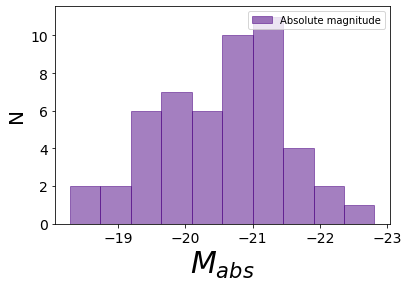

In [8]:
#-----absolute-magnitude-distribution-----
import math
from scipy.stats import norm
import matplotlib.mlab as mlab
M_abs = []
M_abs_sdss = []
M_difference = []
plt.rcParams['text.usetex'] = False

for i in range(len(mag_2d)):
    M_abs.append(mag_2d[i]-5*math.log10(lum_distance[i])-25-extinction[i]-K_correction[i])
    M_abs_sdss.append(ModelMag_r[i]-5*math.log10(lum_distance[i])-25-extinction[i]-K_correction[i])
    M_difference.append(M_abs[i]-M_abs_sdss[i])
fig, ax = plt.subplots()
kwargs = dict(alpha=0.5, bins=10)
n, bins, patches = ax.hist(M_abs, **kwargs, color='indigo',edgecolor='indigo', label = 'Absolute magnitude')
ax.legend(loc='upper right')
ax.set_xlabel('$M_{abs}$', size = 30)
ax.set_ylabel('N', size = 20)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.invert_xaxis()


plt.xticks(size = 14)
plt.yticks(size = 14)
plt.show


print(np.mean(M_abs))
print(sem(M_abs))


51 51
Estimated coefficients:
b_0 = 0.1758306519848845            
b_1 = -0.015781292558390076
(-0.05789960678643897, 0.6865260391534013)


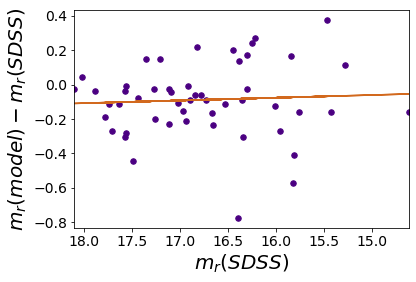

In [9]:
#--------dot-plot---------
mag_2d = np.array(mag_2d)
ModelMag_r = np.array(ModelMag_r)
m_difference = []
print(len(mag_2d), len(ModelMag_r))
for i in range(len(mag_2d)):
    m_difference.append(mag_2d[i]-ModelMag_r[i])
m_difference = np.array(m_difference)
M_abs = np.array(M_abs)
M_abs_sdss = np.array(M_abs_sdss)
M_difference = np.array(M_difference)
main(ModelMag_r, m_difference, "$m_r(SDSS)$", "$m_r(model)-m_r(SDSS)$", invert_xaxis = True)
#main(M_abs_sdss, M_difference, "$M_r(SDSS)$", "$M_r(model)-M_r(SDSS)$", invert_xaxis = True)

788 43
0.4121190707070263
0.026118142882985654
0.32478363112039443
0.003775505674529097


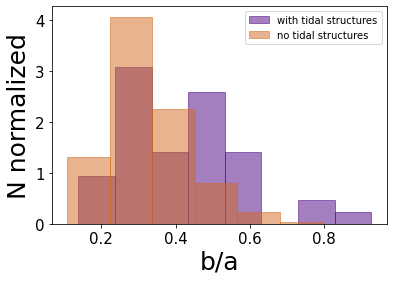

In [40]:
### tidal structures
from numpy import mean

initial_params = np.genfromtxt("/home/maria/Documents/projects/Stripe82/super_final_sample1.txt")
sma, smb = initial_params[:,3], initial_params[:,4];

tidal_indexes = [28, 38, 41, 43, 52, 85, 88, 104, 126, 
                 165, 175, 181, 189, 202, 222, 235, 247, 
                 262, 270, 287, 307, 309, 329, 338, 349, 354,
                 424, 426, 471, 526, 533, 552, 602, 621, 627,
                 681, 685, 712, 730, 743, 777, 792, 800]
sma_tidal = []
smb_tidal = []   
sma_not_tidal = []
smb_not_tidal = []

ellipticity_tidal = []
ellipticity_not_tidal = []

for i in range(len(sma)):
    if i in tidal_indexes:
        sma_tidal.append(sma[i])
        smb_tidal.append(smb[i])
        ellipticity_tidal.append(smb[i]/sma[i])
    else:
        sma_not_tidal.append(sma[i])
        smb_not_tidal.append(smb[i])
        ellipticity_not_tidal.append(smb[i]/sma[i])
        
ellipticity_tidal_mean = mean(ellipticity_tidal)
ellipticity_not_tidal_mean = mean(ellipticity_not_tidal)

fig, ax = plt.subplots()
kwargs = dict(alpha=0.5, bins=8)
print(len(ellipticity_not_tidal), len(ellipticity_tidal))
n, bins, patches = ax.hist(ellipticity_tidal, **kwargs, color='indigo', edgecolor='indigo', label = "with tidal structures", density = True)
n, bins, patches = ax.hist(ellipticity_not_tidal, bins = 6, alpha = 0.5, color='chocolate',edgecolor='chocolate', label = "no tidal structures", density = True)
ax.legend(loc='upper right')
ax.set_xlabel('b/a', size = 25)
ax.set_ylabel('N normalized', size = 25)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show
# import plotly.graph_objects as go
# fig = go.Figure()

# px.histogram(ellipticity_tidal,nbins=10,range_x=[0,1],histnorm='probability')
# px.histogram(ellipticity_not_tidal,nbins=10,range_x=[0,1],histnorm='probability') 

print(np.mean(ellipticity_tidal))
print(sem(ellipticity_tidal))
print(np.mean(ellipticity_not_tidal))
print(sem(ellipticity_not_tidal))        



7.039020283823316
0.5213517542323539
------------
9.119051066223115
0.48302615781538405


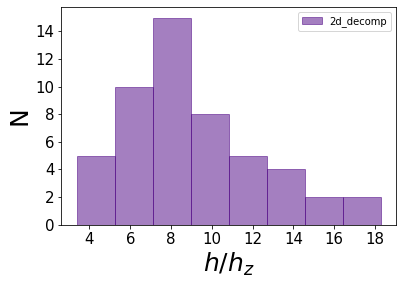

In [39]:
# распределение по h/z_0
from numpy import mean
plt.rcParams['text.usetex'] = False

fig, ax = plt.subplots()
kwargs = dict(alpha=0.5, bins=12)

#n, bins, patches = ax.hist(np.divide(h_1d_kpc,h_z_1d_kpc), **kwargs, color='indigo',edgecolor='indigo', label = "1d_decomp")
n, bins, patches = ax.hist(np.divide(h_2d_kpc,h_z_2d_kpc), bins = 8, alpha = 0.5, color='indigo',edgecolor='indigo', label = "2d_decomp")
ax.set_xlabel('$h/h_z$', size = 25)
ax.set_ylabel('N', size = 25)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(loc='upper right')
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show
 
print(np.mean(np.divide(h_1d_kpc,z_0_1d_kpc)))
print(sem(np.divide(h_1d_kpc,z_0_1d_kpc)))

print("------------")

print(np.mean(np.divide(h_2d_kpc,h_z_2d_kpc)))
print(sem(np.divide(h_2d_kpc,h_z_2d_kpc)))

        



In [18]:
import numpy as np
from numpy import mean
# h_lim = 1
VV_m = []
initial_params = np.genfromtxt('/home/maria/Documents/projects/Stripe82/super_final_sample_no_duplicates_sorted.txt')
sma, smb = initial_params[:,3], initial_params[:,4]
# h_r_2d = np.array(h_r_2d)
# print(np.max(h_r_2d))
# h_lim = h_r_2d[(h_r_2d >= 4.5)]
# for i in range(len(h_lim)):
#     VV_m.append(np.min(h_lim)**3/h_lim[i]**3)
# print(mean(VV_m))
sma_all = len(sma)
print("sma all", sma_all)
sma = sma[(sma >= 17)]
sma_after = len(sma)
print("sma after", sma_after)
for i in range(len(sma)):
    VV_m.append(np.min(sma)**3/sma[i]**3)
print("mean", mean(VV_m))

print("percentage",sma_after/sma_all*100)

sma all 839
sma after 395
mean 0.47401268640572447
percentage 47.07985697258641


Estimated coefficients:
b_0 = -1.0304916267888506            
b_1 = 0.31716232703526304
(0.5689577976290835, 1.3226565883833567e-05)


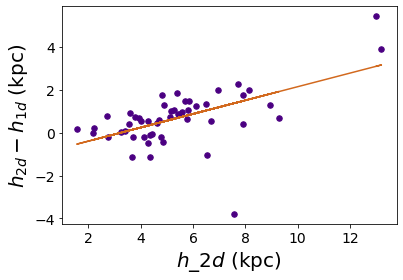

In [13]:
h_r = np.array(h_r)
h_r_2d = np.array(h_r_2d)
main(h_2d_kpc, h_2d_kpc-h_1d_kpc, "$h\_{2d}$ (kpc)", "$h_{2d}-h_{1d}$ (kpc)", invert_xaxis = False)
#main(h_z_2d_kpc, h_z_2d_kpc-h_z_1d_kpc, "$h\_z_{2d}$(kpc)", "$h\_z_{2d}-h\_z_{1d}$(kpc)", invert_xaxis = False)

Estimated coefficients:
b_0 = 1.1720924498764782            
b_1 = -0.15565709584048487
(-0.10099441570881909, 0.48070442480866754)


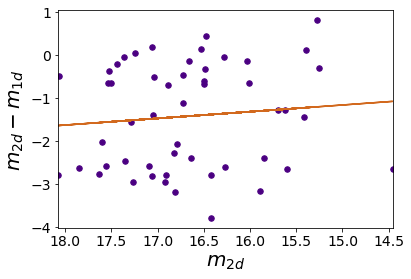

In [84]:
mag_1d = np.array(mag_1d)
mag_2d = np.array(mag_2d)
main(mag_2d, mag_2d-mag_1d, "$m_{2d}$", "$m_{2d}-m_{1d}$", invert_xaxis = True, invert_yaxis = False)

-21.087193284493285
0.028788949213343597


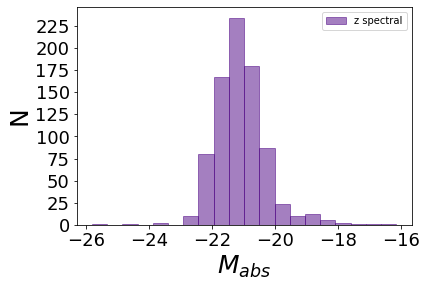

In [27]:
M_abs_all = []
z_all = []
with open('/home/maria/Documents/projects/Stripe82/z_amd_M_all.csv', "r", newline="") as f:
    reader = csv.reader(f, delimiter=' ')
    for row in reader:
        z_all.append(float(row[0]))
        M_abs_all.append(float(row[1]))
z_all = np.array(z_all)
M_abs_all = np.array(M_abs_all)

import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
from matplotlib.ticker import MaxNLocator
from scipy.stats import sem
plt.rcParams['text.usetex'] = False
    
fig, ax = plt.subplots()
kwargs = dict(alpha=0.5, bins=20)

n, bins, patches = ax.hist(M_abs_all, **kwargs, color='indigo',edgecolor='indigo', label = 'z spectral')
ax.legend(loc='upper right')
ax.set_xlabel('$M_{abs}$', size = 25)
ax.set_ylabel('N', size = 25)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.xticks(size = 18)
plt.yticks(size = 18)
plt.show


print(np.mean(M_abs_all))
print(sem(M_abs_all))
